In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)


In [4]:
df = pd.read_csv(r"D:\Oasis Data Internship\menu.csv")
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:\n", df.columns)

# Data types and null values
df.info()


Dataset Shape: (260, 24)

Columns:
 Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    ob

In [6]:
# Check missing values
df.isnull().sum()
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Cleaning completed.")


Cleaning completed.


C:\Users\nimis\AppData\Local\Temp\ipykernel_64856\405747572.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


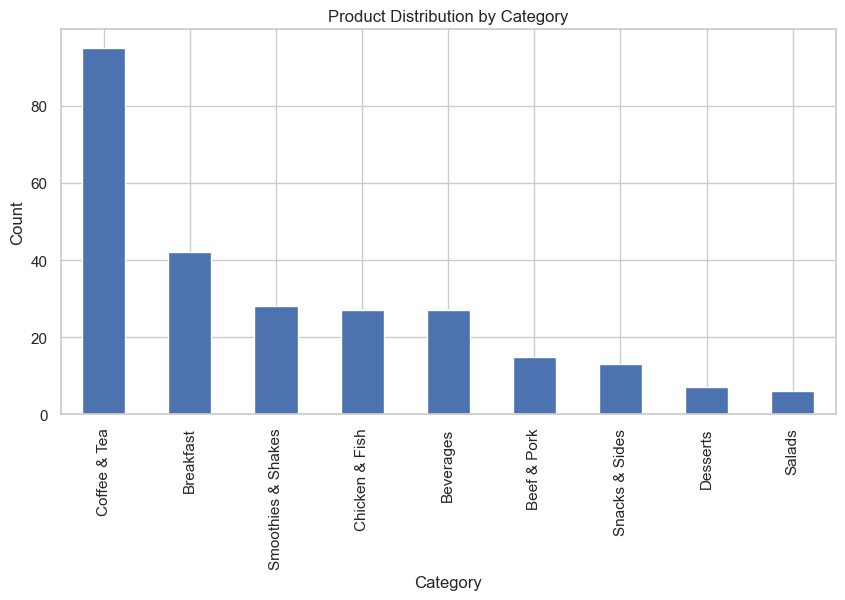

In [7]:
# Summary statistics
df.describe()
if 'Category' in df.columns:
    df['Category'].value_counts().plot(kind='bar')
    plt.title("Product Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()


In [8]:
price_cols = [col for col in df.columns if 'Price' in col or 'price' in col]

for col in price_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [9]:
if 'Calories' in df.columns and price_cols:
    sns.scatterplot(x=df['Calories'], y=df[price_cols[0]])
    plt.title("Calories vs Price")
    plt.xlabel("Calories")
    plt.ylabel("Price")
    plt.show()


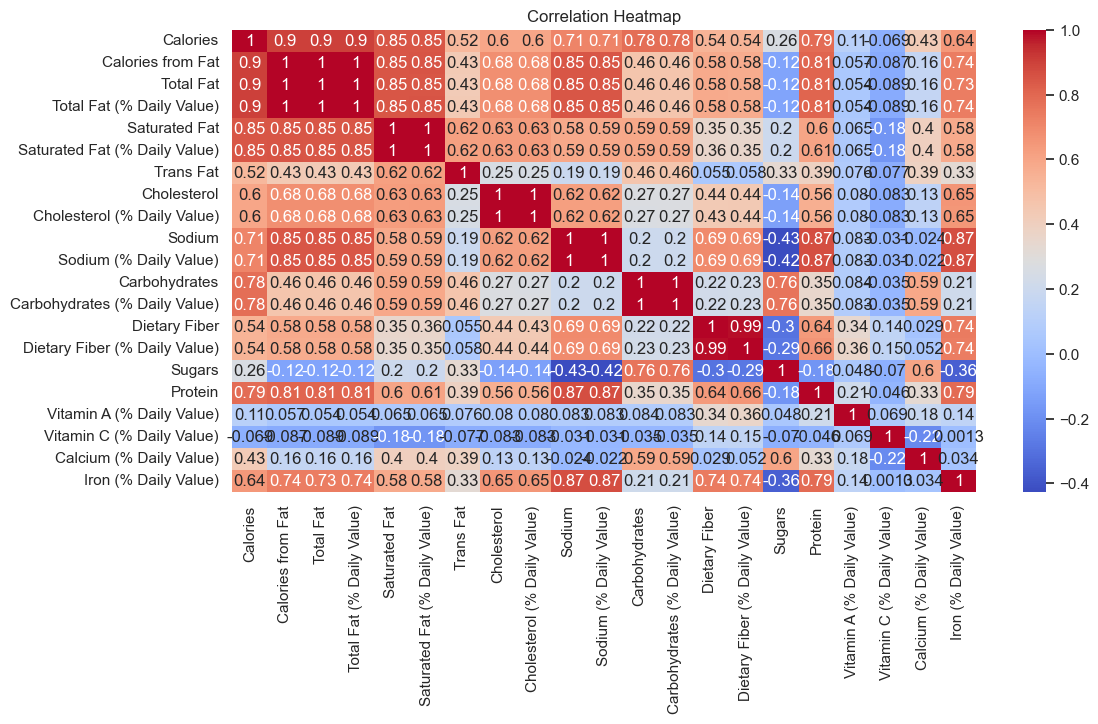

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### 🔍 Key Insights from EDA

- Most products belong to a limited number of categories.
- Price distribution is slightly skewed, with most items priced in a mid range.
- Higher calorie items generally tend to have higher prices.
- Some numerical features show strong correlation, which can help in future modeling.


In [ ]:
### ✅ Conclusion

This exploratory data analysis helped in understanding the structure, trends, and patterns
within the retail sales dataset. Through visualization and statistical analysis, valuable
insights were derived which can assist businesses in pricing strategy, product planning,
and customer targeting.
